# HOL2148 - Working with Objectstores

## 0. Introduction

In this notebook we connect to an objectstore. For the purpose of this lab a MinIO Server https://min.io/ (opensource S3 campatible Objectstorage implementation) is running on a virtual machine in the demo cluster.   
To connect to Minio we first must define a S3 connection asset in this project - this will be the start of this lab.  
<br>
Note: In case pictures are not shown correctly, make this notebook editable:  
    - Cick the Edit button on the top
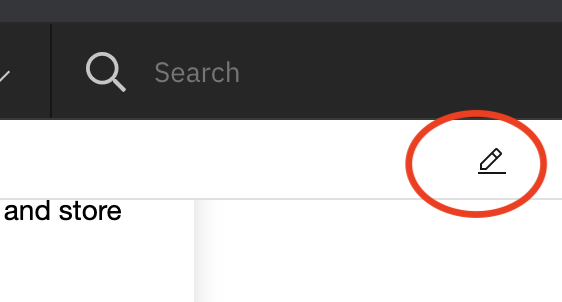

## 1. Prerequistes
This exersice requires some familiarity with Python and Jupyter notebooks. Only very basic knowledge is required - not more than being able to edit and run a cell. See the description below and in the case of questions please refer to a lab instructor.
Sample Python code is given in the examples - basic understanding from other programming languages will be sufficient to understand the code and modify it. So you will be able to experiment what will happen e.g. to look at the contents of other objetcs as those from the examples.

To run the cells a data-connection to the MinIO objectstore must be added to the project

### Add an Amazon S3 connection to your project

To perform the following steps you will need to go to the project landing page. As a best practice it is best to leave this notebook open in its tab and open a new one in your browser, so you can conveniently switch back and forth.
<br>
1. Go Back to the Project Landing Page or open it in a new tab (righ-click and choose to open in a new tab)
   - your project is the name you choose when created the project - not the one shown in the example below
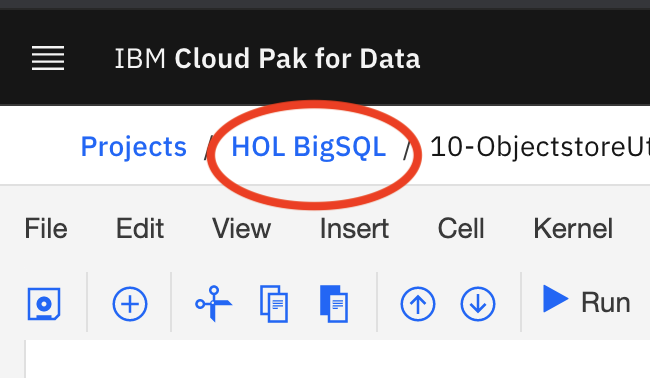
2. Add a connection-asset to the project
   - Click "Add to project" from the top right
   - Click "Connection" 
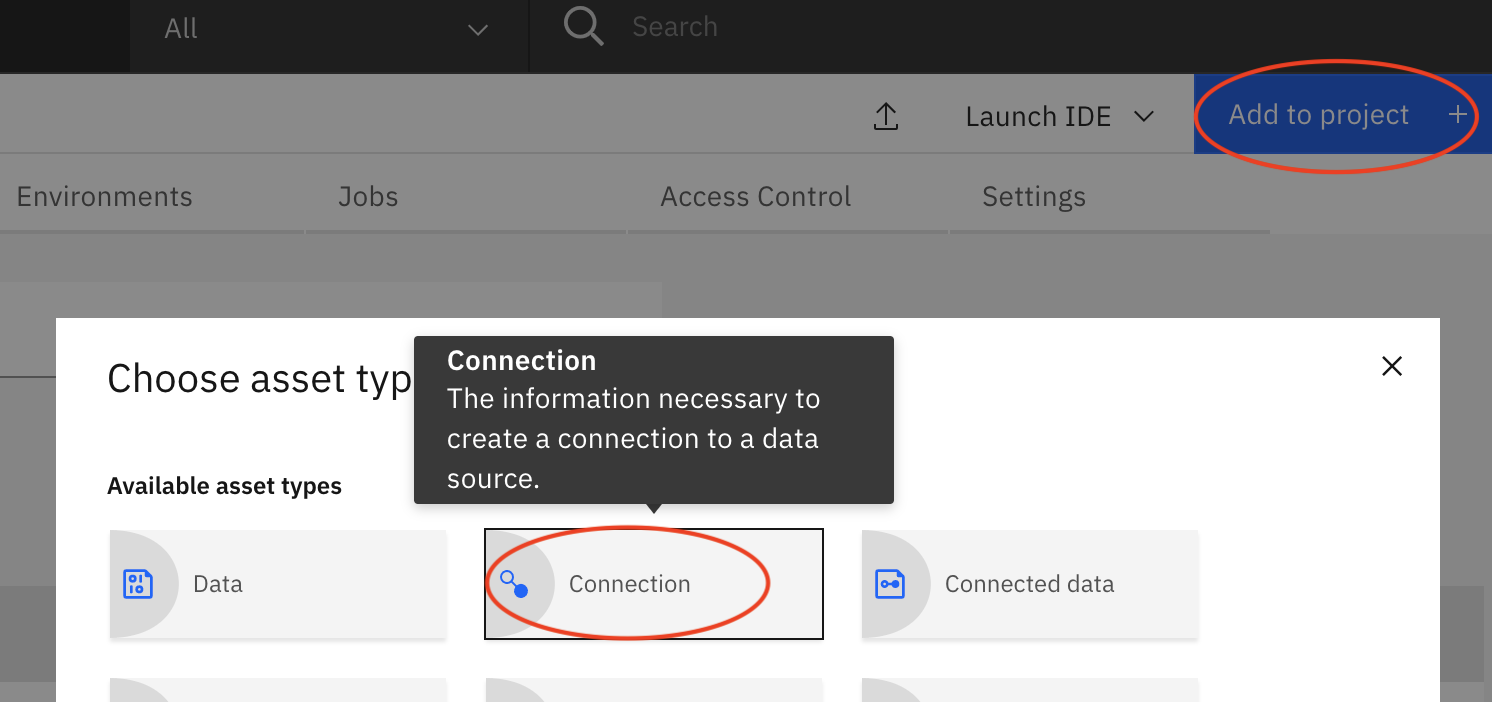
3. Add Connection
    - Choose "New"
    - and then "Amazon S3"
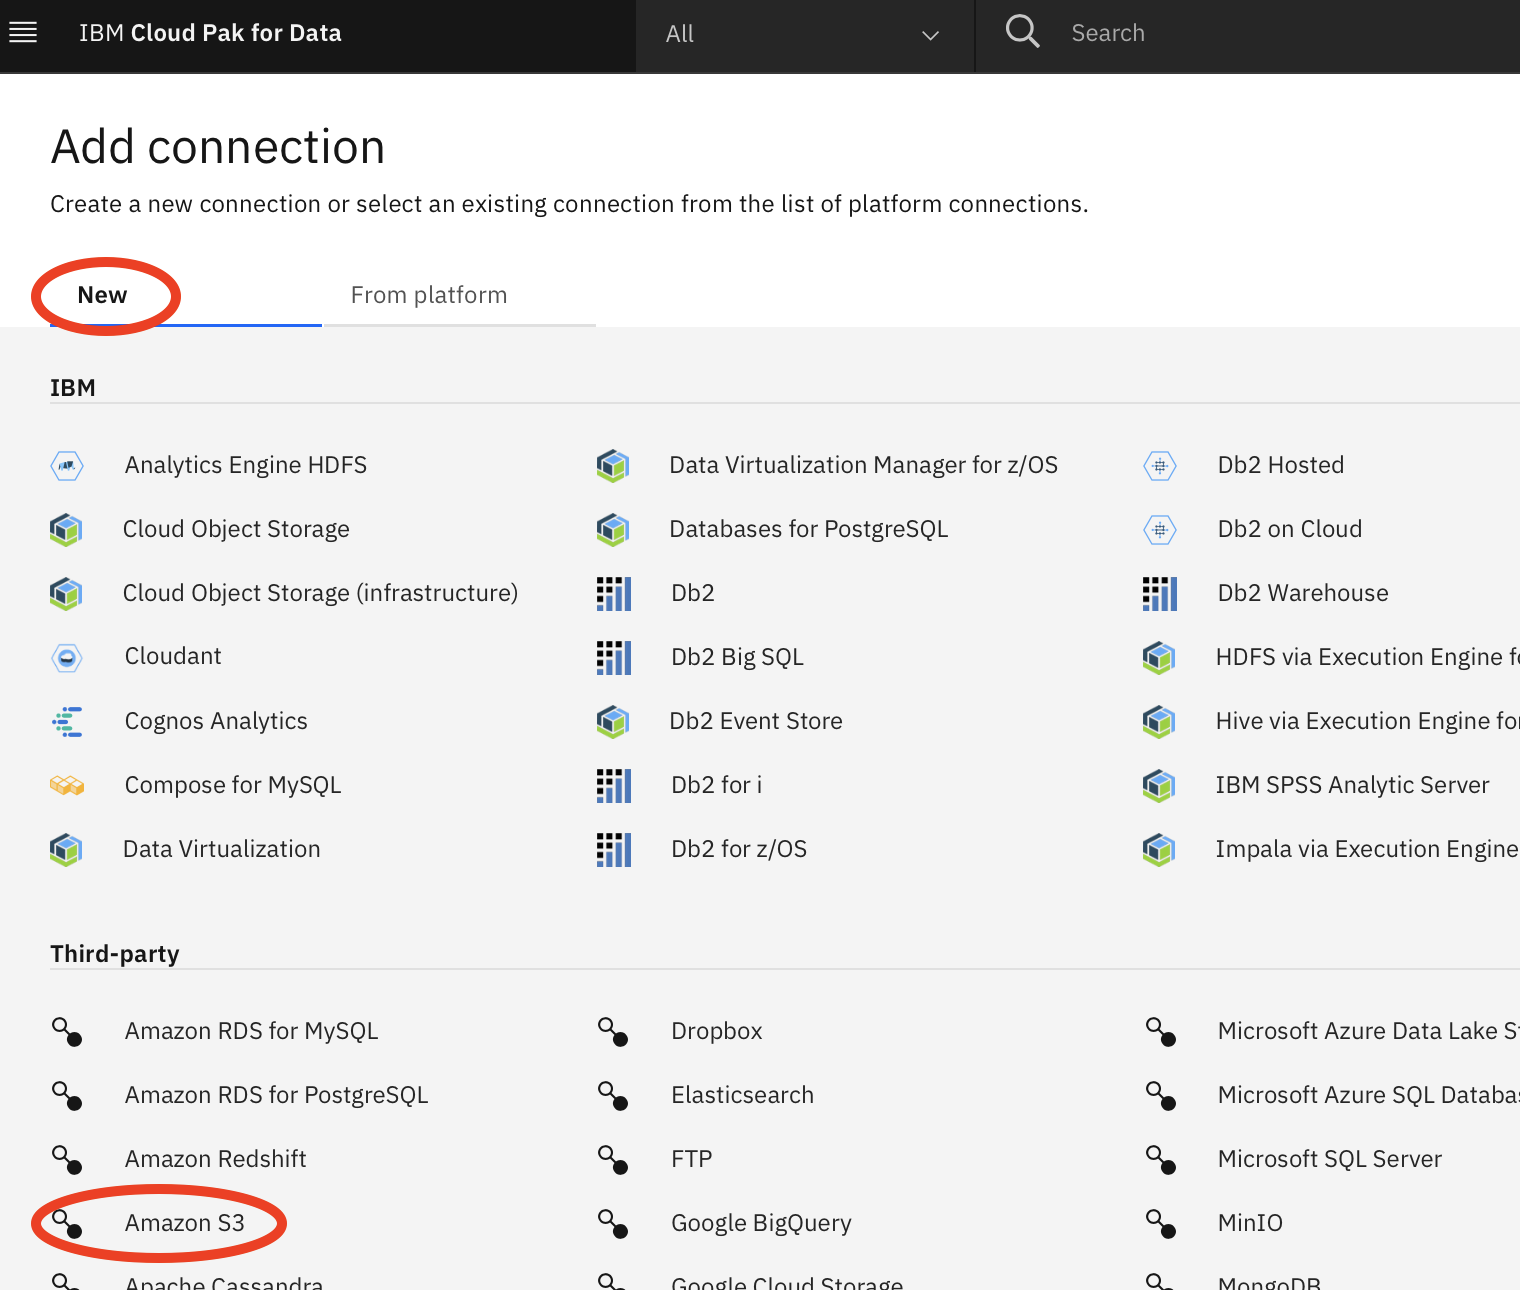
Fill in the connection information and credentials:
    - Name = "MinioLocal" (The name will be used to reference this connection)
    - Endpoint URL "http://10.1.1.10:9000" 
    - Credentials = select "Personal"
    - Access Key = your MinIO user e.g. "user"\<YOUR-ID>    
    - Secret Key = your MinIO password "passuser"\<YOUR-ID>   
\<YOUR-ID> is a two digit code: your user ID with a leading zero if single digit  
Example: User 1 - Access Key=user01, Secret Key=passuser01 
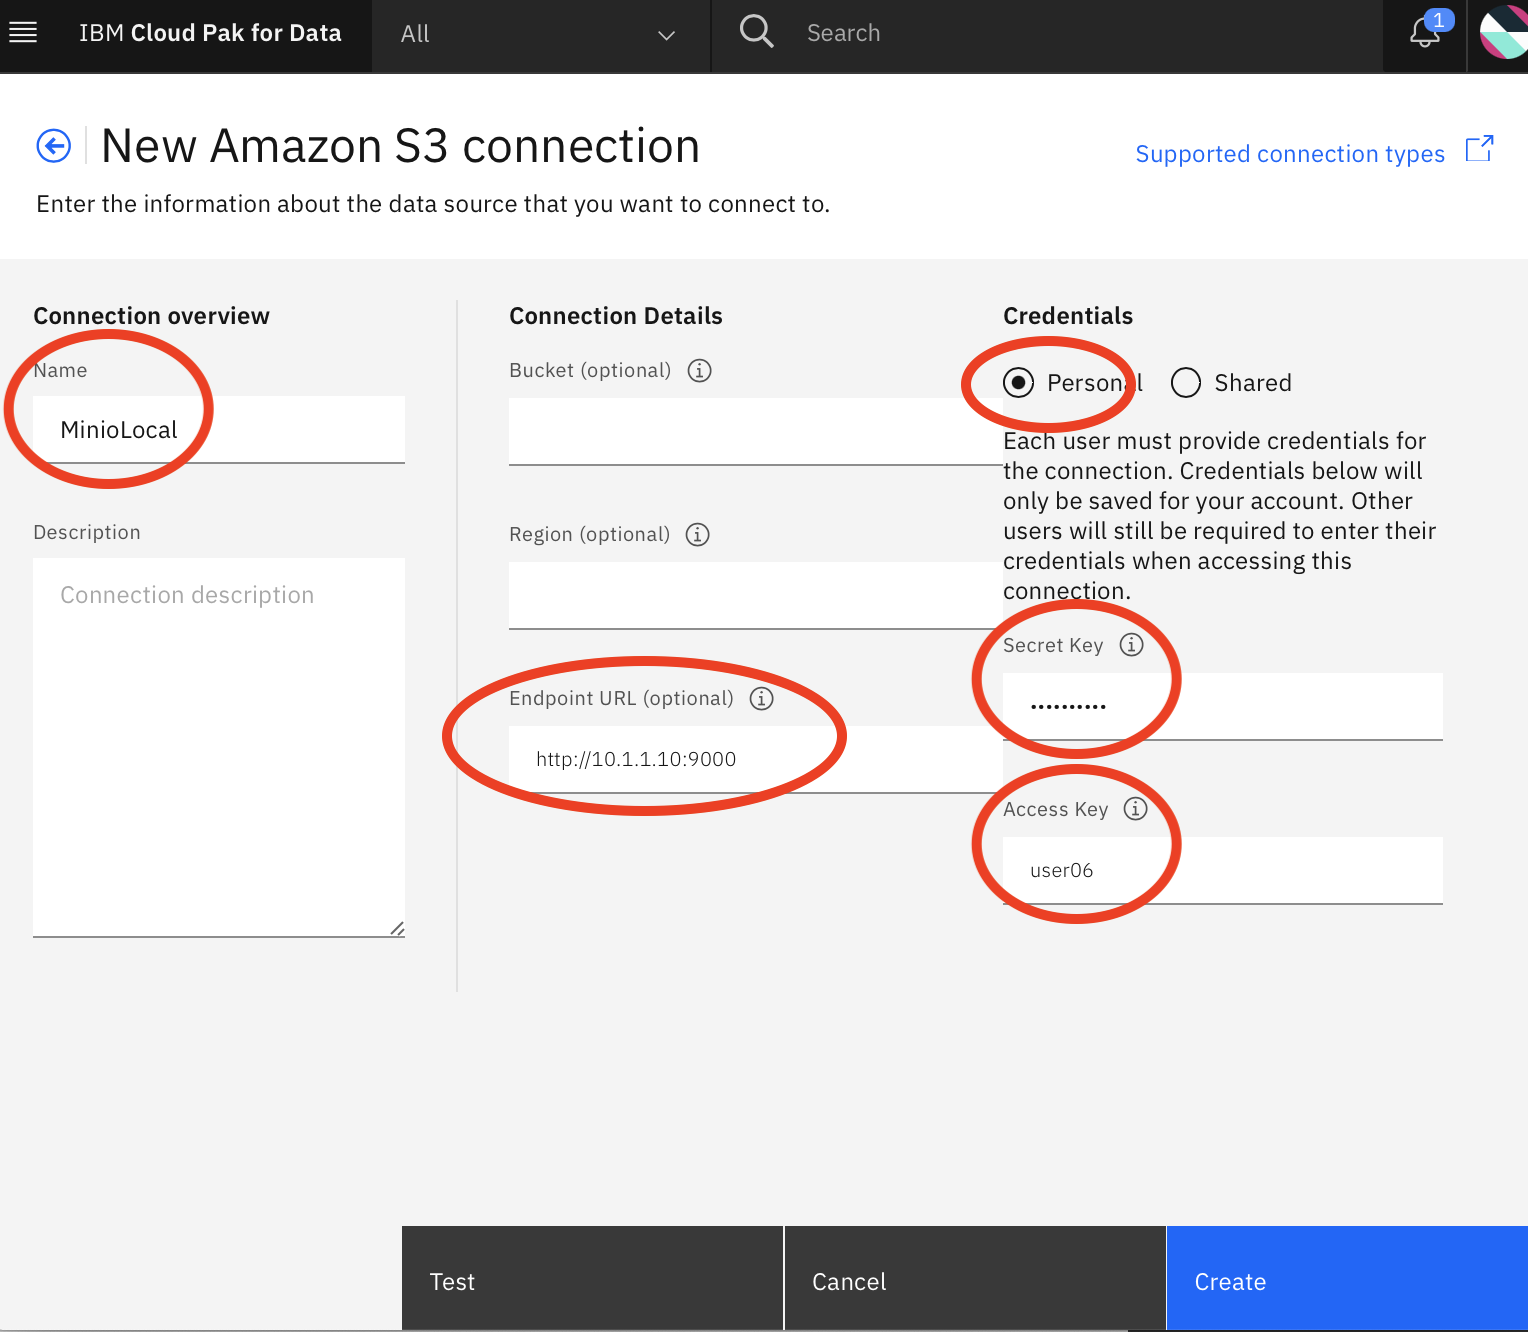
You may want to Test the it by clicking "Test".   
Otherwise just choose "Create"
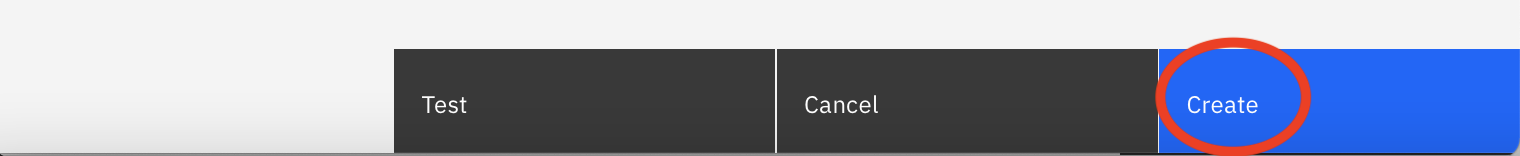
4. Open this Notebook again

## 2. Run the cells below
1. Ensure this notebook editable   
    - If not cick the edit button on the top
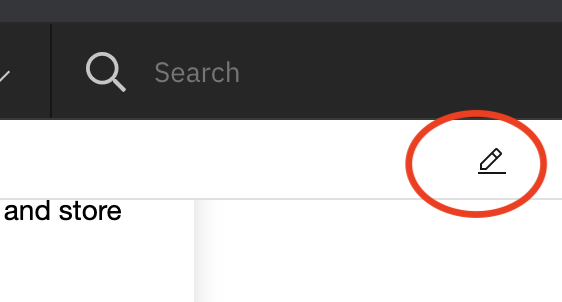
Clicking the pen-icon will not only make this notbook editable but will also start the runtime-environment: a container that hosts the Python runtime which this notbook will use.   
Be patient this will take some seconds.   

### Carry on by executing the cells
An editable cell is proceeded by "In" and suaqre brackets "In [ ]". When a cell is currently executed an asterisk symbol is shown inside the brackets "[\*]". As soon as it is finished you will see an integer giving the execution number - this starts with zero when your kernel ( runtime) is initialized and is incremented every time you execute a cell. So in this way you are able to determin if an cell was executed and in which order. Where in general you are able to execute the cells in an arbitrary order throughout this lab they need to be run from the top - otherwise you will get errors e.g. when a variable is not initialized.
<br>
Execute each cell one by one and check the results. 
#### 1. Run your first cell
   - Make sure you are able to execute cells
   - Click at any place into the first cell below and rund it by by pushing \<SHIFT> and \<RETURN>.     

#### 2. Then proceed executing the following cells
   - Connect to MinioCluster
   - List the objects 
        - Buckets
        - Objects (Files)
        - Print Contents of a sample File
in the remaining part of this notebook.

### The following code uses a connection that was previously added to the project
No output is expected - this should run without error

In [ ]:
import boto3
from project_lib import Project
project = Project.access()
MinioLocalCluster_credentials = project.get_connection(name="MinioLocal")

The credentials are returned as a python dictionary
Lets have a look and print the crendentials

In [ ]:
MinioLocalCluster_credentials

The output above should start like this:   
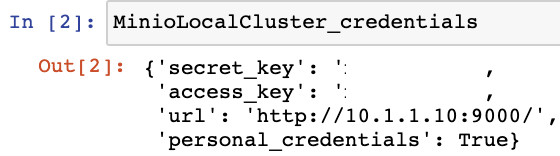
Please note that the cedentials are contained you are able to see the password in clear text - so at any time when you share a notebook (e.g. when you chek in a notebook to Git) make sure it contains no sensitive data like credentials.

### Connect to S3
We use the boto3 - a S3 Python library to work with the files on our S3 server.   
Please note there are Minio-Specific libraries out that may be optimized for Minio.  
For this Lab we target for platform indepedency - this code should run with your S3 provider of choice.

In [ ]:
# Connect to s3

client = boto3.client(
    's3',
    endpoint_url=MinioLocalCluster_credentials['url'],
    aws_access_key_id=MinioLocalCluster_credentials['access_key'],
    aws_secret_access_key=MinioLocalCluster_credentials['secret_key']
)

In [ ]:
# Lets play with the connection - first lets have a look at buckets
# -> which buckts are available?

In [ ]:
buckets = client.list_buckets()

for bucket in buckets["Buckets"]:
    print(bucket["Name"])

Note you see all buckets availlable - user00 is a shared bucket which is used read only by all students.   
Each student has one specific user (which was previously used as Access Key in the connection) and a corresponding bucket. 
The bucket is named identical to the user name (e.g. user01) - this bucket will be the only folder that is written to.  
You will have read access to all buckets but only write to your own.

### Now navigate in the structure
As said bucket00 is special - the shared input bucket.<br>
Lets see what is inside and list objects in bucket00 and then experiment with others (optional).

Tasks <br>
   - First list the contents of the shared foldet
   - Then you can than change "user00" in the cell below with your specific bucket and then run the cell again
<br>Remark: Your bucket should be empty, you can revisit this when you have finished the next notebook 23-BigSQL-ETL

In [ ]:
bucket= "user00" # start with user00 check the results, than chek with your bucket e.g. bucket06
docBucket = client.list_objects(Bucket=bucket)

print("\nList of Objects:")
try: 
    for key in docBucket['Contents']:
        print("{name}\t{size}\t{modified}".format(
                    name = key['Key'],
                    size = key["Size"],
                    modified = key["LastModified"]))
except KeyError:
   print("empty bucket");

### Now lets see inside a object
We will extract and print some text.

In [ ]:
# Issue a REST-get
response = client.get_object(
    Bucket="user00", 
    Key="orders/orders.tbl",
)

# Debug - uncomment the following line if you like and then execute the cell again
#print(response['ResponseMetadata'])
#print(response.keys())

###    Read data from response.
Print first n (=128) bytes

In [ ]:
bytesToRead = 128
print(response['Body'].read(bytesToRead).decode('utf-8'))

This concludes 20-Objectstore-Utilities continue with "23-BigSQL-ETL"

**This project contains Sample Materials, provided under license. <br>
Licensed Materials - Property of IBM. <br>
© Copyright IBM Corp. 2021. All Rights Reserved. <br>
US Government Users Restricted Rights - Use, duplication or disclosure restricted by GSA ADP Schedule Contract with IBM Corp.<br>**